# 702 精准率和召回率的平衡与曲线

## 精准率和召回率的平衡
<img src='./image/8.png' style='zoom:30%'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [5]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [7]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [8]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

### 通过decision_function取出得分值，以便于重新定义阈值

In [9]:
log_reg.decision_function(X_test)[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [10]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
decision_scores = log_reg.decision_function(X_test)

In [15]:
print(np.min(decision_scores))
print(np.max(decision_scores))

-85.68608522646575
19.8895858799022


### 增加阈值到5：

In [16]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')
print(confusion_matrix(y_test, y_predict_2))
print(precision_score(y_test, y_predict_2))
print(recall_score(y_test, y_predict_2))

[[404   1]
 [ 21  24]]
0.96
0.5333333333333333


### 减少阈值到-5：

In [17]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')
print(confusion_matrix(y_test, y_predict_3))
print(precision_score(y_test, y_predict_3))
print(recall_score(y_test, y_predict_3))

[[390  15]
 [  5  40]]
0.7272727272727273
0.8888888888888888


## 精准率和召回率曲线

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

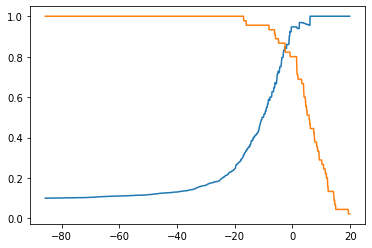

In [19]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)

### Precision-Recall 曲线

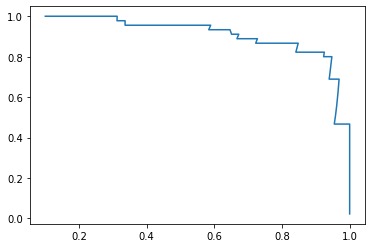

In [20]:
plt.plot(precisions, recalls)

### scikit-learn中的Precision-Recall曲线

In [21]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [22]:
precisions.shape, recalls.shape, thresholds.shape   # 注意 thresholds 最后一维是没有数值的。

((145,), (145,), (144,))

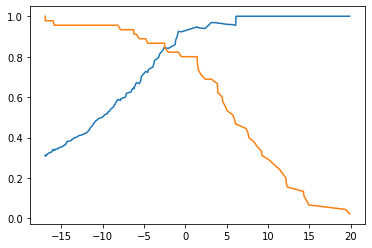

In [23]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

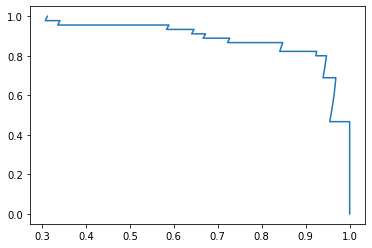

In [24]:
plt.plot(precisions, recalls)

## ROC曲线 Receiver Operation Characteristic Curve
通过面积，比较两个模型的优劣。  
TPR和FPR的定义   
<img src='./image/9.png' style='zoom:50%'>
描述TPR和FPR之间的关系
<img src='./image/10.png' style='zoom:50%'>

In [25]:
import sys
sys.path.insert(0,'./code')
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

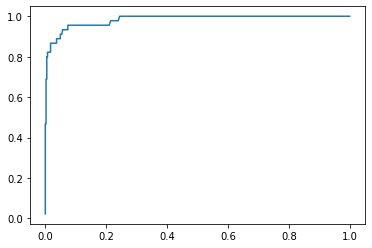

In [26]:
plt.plot(fprs, tprs)

### scikit-learn中的ROC

In [27]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

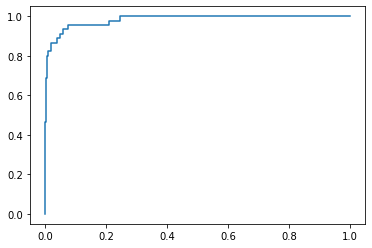

In [28]:
plt.plot(fprs, tprs)

### ROC AUC

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119